# ****DECISION TREE**** #

## Objective: ##
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


### Tasks: ###

## 1. Data Preparation: ##
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


imporing the libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

loading and reading the dataset

In [13]:
df=pd.read_excel("F:\DATA SCIENCE_ExcelR\Assignments\Decision Tree\heart_disease.xlsx",sheet_name=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


shape of the dataset

In [16]:
df.shape

(908, 13)

columns in the dataset 

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

information of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


checking for the null values

In [15]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

62 null values of oldpeak are present in the dataset

checking for duplicates

In [23]:
df.duplicated().sum()

1

1 duplicate lets drop it 

In [28]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

no duplicates

statistical information of the dataset

In [35]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,845.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892308,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.094092,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


the target variable is num here as it decides wether the person is having the heart disease or not 

---

## 2. Exploratory Data Analysis (EDA): ##

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.


# count plot 

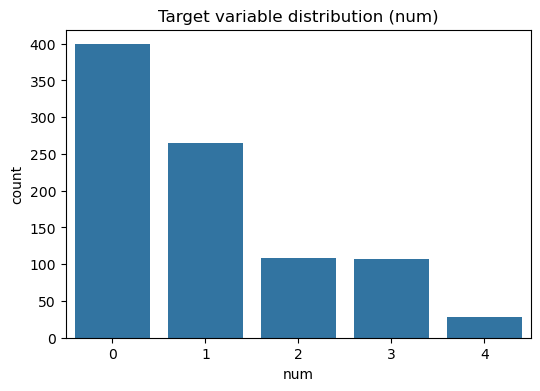

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df)
plt.title("Target variable distribution (num)")
plt.show()

# histograms

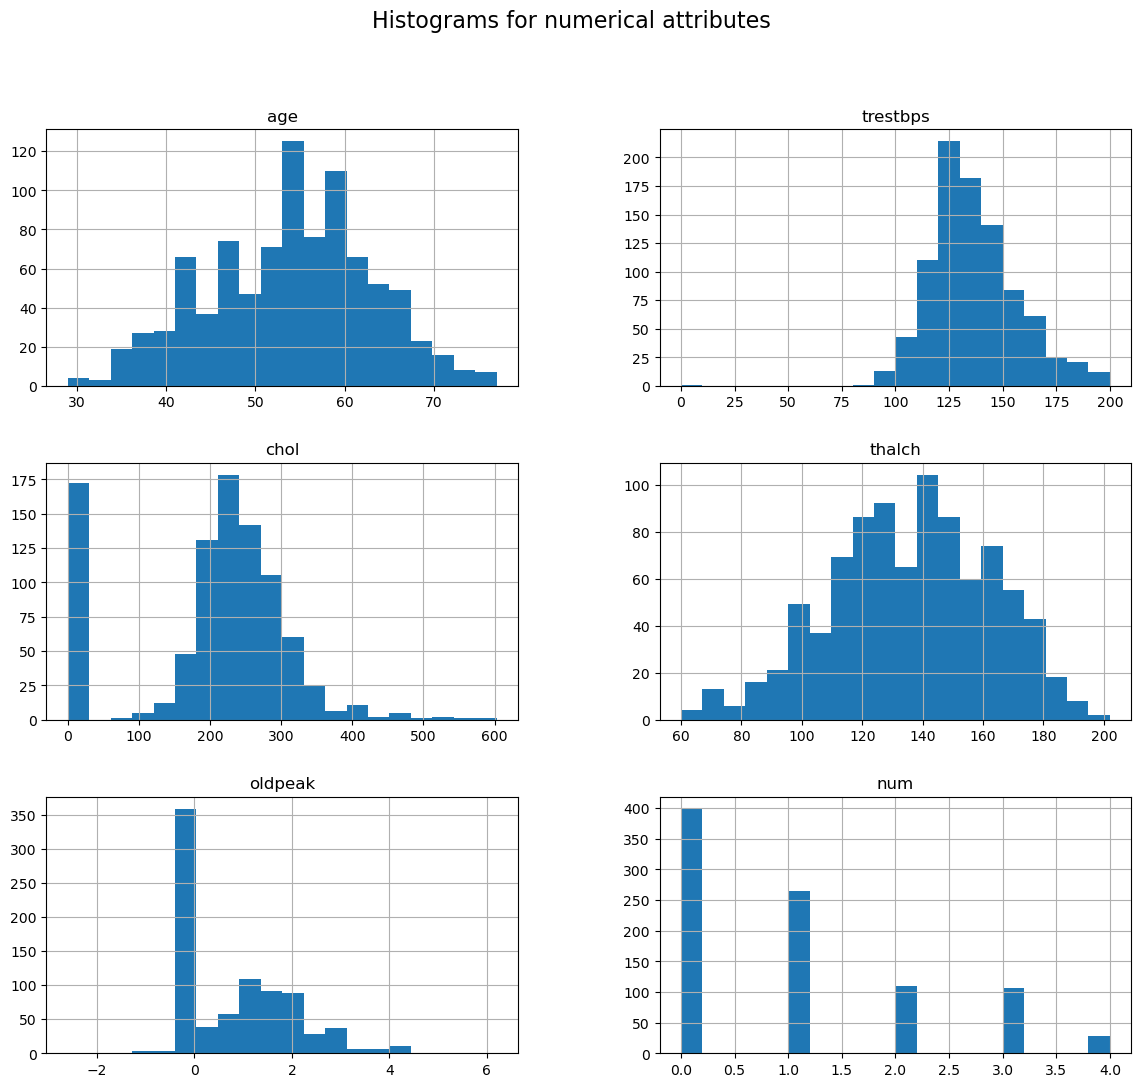

skewness of age is  -0.137
skewness of trestbps is  0.354
skewness of chol is  -0.565
skewness of thalch is  -0.22
skewness of oldpeak is  1.022
skewness of num is  0.951


In [28]:
df.hist(figsize=(14,12), bins=20)
plt.suptitle("Histograms for numerical attributes", fontsize=16)
plt.show()

num_cols=df.select_dtypes(include=['int64','float64']).columns
num_cols
for col in num_cols:
    skewness=df[col].skew()
    print(f"skewness of {col} is ",np.round(skewness,3))

when we look at the skewness of all 
* age, trestbps thalch are almost symmetric
* chol is slight negatively skewed
* oldpeak is positively skewed
* even though num is target variable its showing positive skew 

# boxplots and outlier detection

In [1]:
num_columns = df.drop(columns=['num']).select_dtypes(include=['int64','float64']).columns.tolist()
num_columns

NameError: name 'df' is not defined

columm :  age
No of outliers :  0
Outlier percentage :  0.0





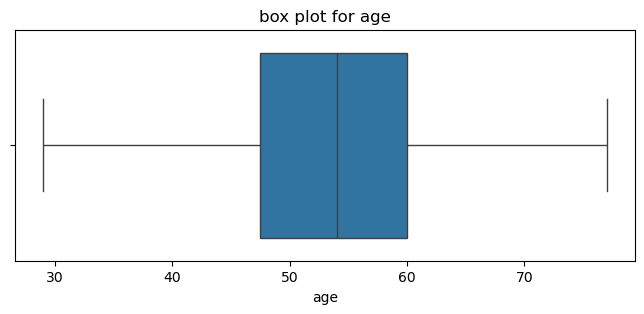

columm :  trestbps
No of outliers :  22
Outlier percentage :  2.426





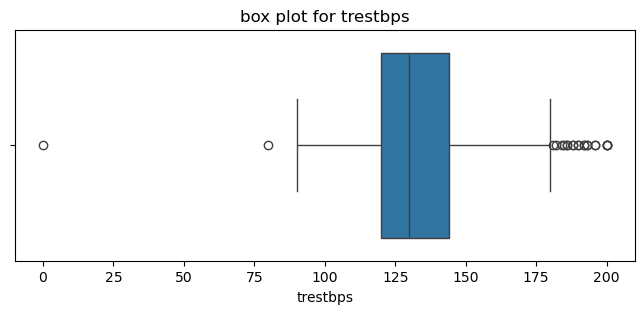

columm :  chol
No of outliers :  187
Outlier percentage :  20.617





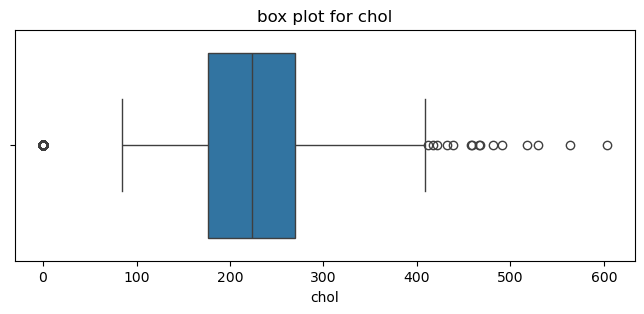

columm :  thalch
No of outliers :  1
Outlier percentage :  0.11





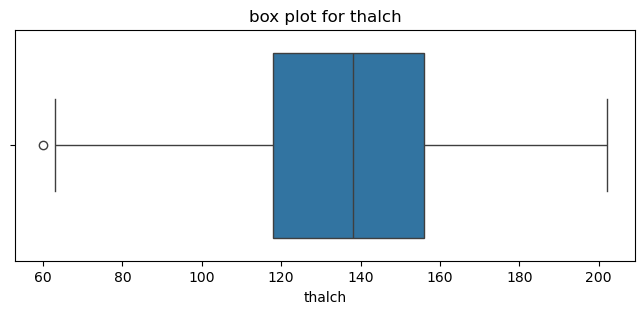

columm :  oldpeak
No of outliers :  16
Outlier percentage :  1.764





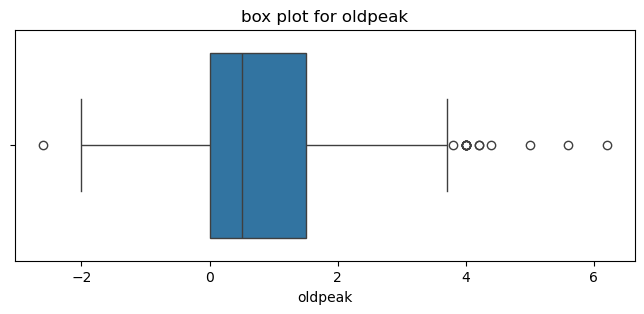

In [50]:
for col in num_columns:
    s = df[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    uwl = q3 + 1.5 * iqr
    lwl = q1 - 1.5 * iqr
    outliers = s[(s < lwl) | (s > uwl)]
    print("columm : ",col)
    print("No of outliers : ",len(outliers))
    percent=(len(outliers)/len(df))*100
    print("Outlier percentage : ",np.round(percent,3))
    print("\n\n")
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f"box plot for {col}")
    plt.xlabel(col)
    plt.show()



* age - 0 outliers means clean
* trestbps - 22 outliers means maybe of low /high bp
* chol - 187 outliers maybe bcoz may patients have high cholestrol or zero which is impossible
* thalch - 1 outlier almost zero % it also means clean
* oldpeak -  16 outliers some patients have high values

# correlation - heatmap

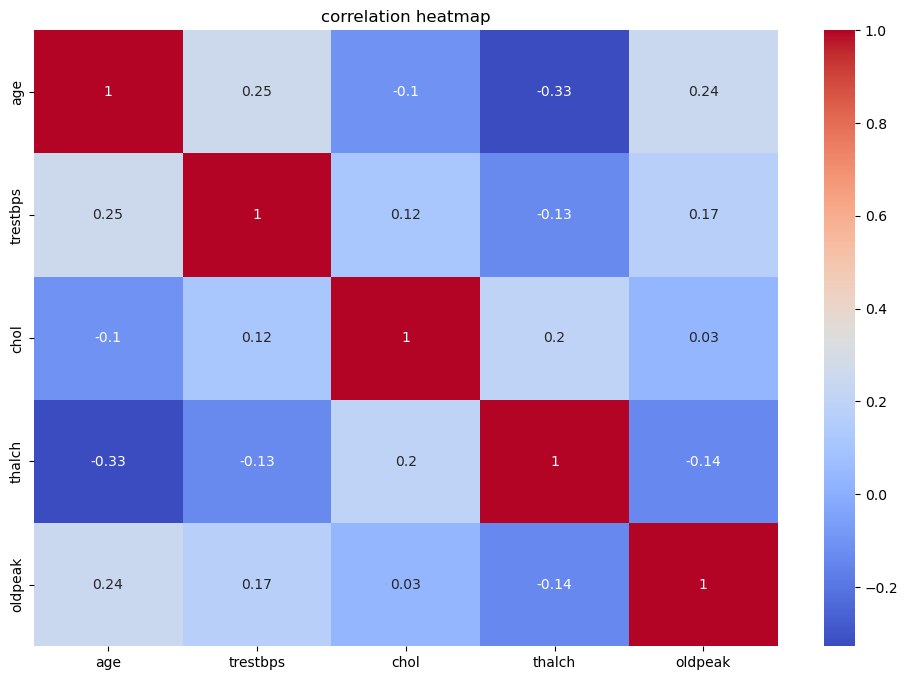

In [54]:
plt.figure(figsize=(12,8))
corr=df[num_columns].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

* there is no multicollinearity 
* when we observe the heatmap we can see there is a strong relation b/w age and thalch 

## 3. Feature Engineering: ##
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [39]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

we are filling the null values of oldpeak with median 

In [41]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

we are taking the data which is valid i.e., oldpeak >=0 data

In [61]:
df = df[df['oldpeak'] >= 0]

In [63]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

converting fbs - bool to fbs - int 

In [66]:
df['fbs'] = df['fbs'].astype(int)

we are selecting the categorical columns for label encoding 

In [71]:
categorical_cols = df.select_dtypes(include = ['object']).columns.tolist()
categorical_cols

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,2,1.5,1,0,0


we are splitting the dataset in to x and y variables 

In [76]:
X=df.drop(columns=['num'])
Y=df['num']

we are converting the heart disease with 0 and 1 either he or she is having the heart disease instead of stages

In [79]:
Y = np.where(Y > 0 , 1 , 0)

---

## 4. Decision Tree Classification: ##

Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


splitting the data for training and testing

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=34,stratify=Y)

In [87]:
df.shape

(833, 13)

In [89]:
X_train.shape

(666, 12)

In [91]:
X_test.shape

(167, 12)

# decision tree

In [94]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,classification_report

In [96]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [98]:
Y_pred=model.predict(X_test)
Y_pred_proba=model.predict_proba(X_test)

In [104]:
cm=confusion_matrix(Y_test,Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
report=classification_report(Y_test,Y_pred)

In [106]:
print("Confusion matrix:\n",cm)
print("Accuracy:",np.round(accuracy,2))
print("Classification report\n",report)

Confusion matrix:
 [[53 22]
 [20 72]]
Accuracy: 0.75
Classification report
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        75
           1       0.77      0.78      0.77        92

    accuracy                           0.75       167
   macro avg       0.75      0.74      0.75       167
weighted avg       0.75      0.75      0.75       167



the accuracy is 75% it means 3 out of 4 predeictions are correct 

with no disease - 
* model predicts 73% correct
* 71% healthy patients

with disease- 
* model predicts 77% correct 
* 78% actual disease cases

f1 score 72% and 77% almost balanced for both without and with disease

# decision tree with outliers

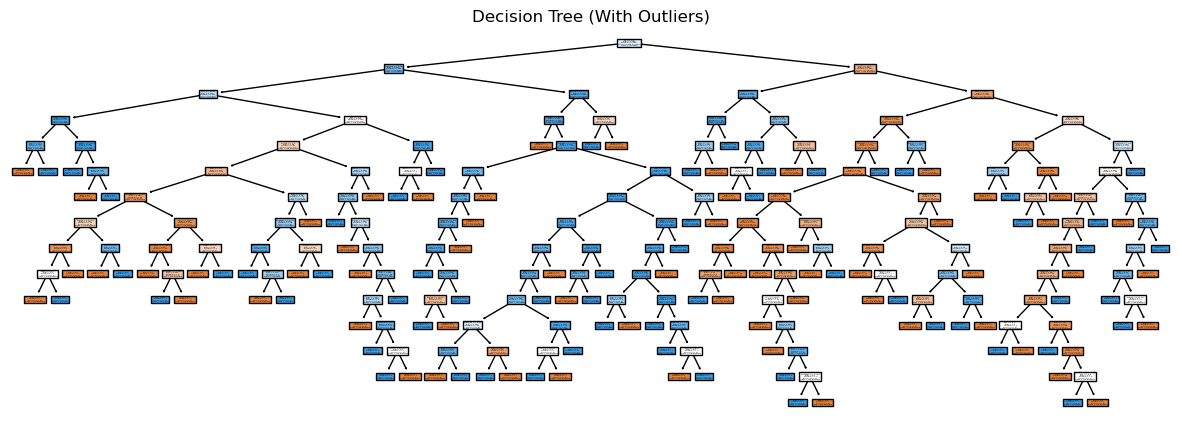

In [112]:
plt.figure(figsize=(15,5))
plot_tree(model, feature_names=X.columns, class_names=["No Disease","Disease"], filled=True)
plt.title("Decision Tree (With Outliers)")
plt.show()

removing the outliers by filling them with nearest whisker lengths

In [115]:
def remove_outliers(data,cols):
    df_clean=data.copy()
    for c in cols:
        s = df_clean[col].dropna()
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        lwl = q1 - 1.5 * iqr
        uwl = q3 + 1.5 * iqr
        df_clean = df_clean[(df_clean[col] >= lwl) & (df_clean[col] <= uwl)]
    return df_clean

In [117]:
num_cols = df.drop(columns=['num']).select_dtypes(include=['int64','float64']).columns
df_without_outliers = remove_outliers(df, num_cols)

In [119]:
X=df_without_outliers.drop(columns=['num'])
Y=df_without_outliers['num']
Y=np.where(Y>0,1,0)

In [121]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=34,stratify=Y)

In [123]:
model=DecisionTreeClassifier() 
model.fit(X_train,Y_train) 

DecisionTreeClassifier()

In [127]:
Y_pred=model.predict(X_test) 
Y_pred_proba=model.predict_proba(X_test) 

In [129]:
cm=confusion_matrix(Y_test,Y_pred) 
accuracy=accuracy_score(Y_test,Y_pred) 
report=classification_report(Y_test,Y_pred)

In [131]:
print("Confusion matrix:\n",cm) 
print("Accuracy:",np.round(accuracy,2)) 
print("Classification report\n",report)

Confusion matrix:
 [[54 21]
 [20 72]]
Accuracy: 0.75
Classification report
               precision    recall  f1-score   support

           0       0.73      0.72      0.72        75
           1       0.77      0.78      0.78        92

    accuracy                           0.75       167
   macro avg       0.75      0.75      0.75       167
weighted avg       0.75      0.75      0.75       167



its almost same even after removing the outliers 

as we know decision tree is robust to outilers 

# decision tree without outliers

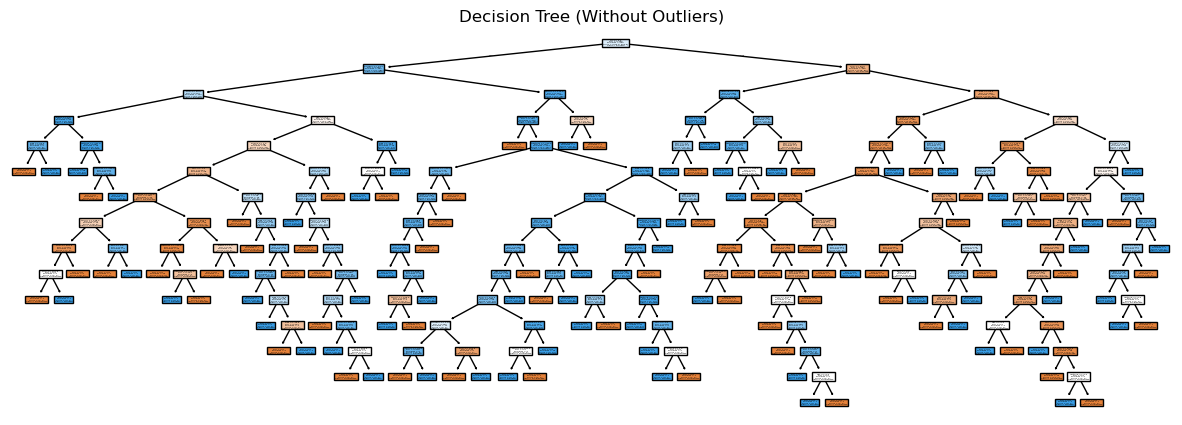

In [135]:
plt.figure(figsize=(15,5))
plot_tree(model, feature_names=X.columns, class_names=["No Disease","Disease"], filled=True)
plt.title("Decision Tree (Without Outliers)")
plt.show()

## 5. Hyperparameter Tuning: ##
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


hyperparameter tuning with gridsearchcv

In [139]:
from sklearn.model_selection import GridSearchCV

In [141]:
parameter_grid = {
    'criterion': ['gini', 'entropy'],      
    'max_depth': [3, 5, 7, 9, None],      
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 5, 10]      
}

In [143]:
model=DecisionTreeClassifier()

In [145]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=parameter_grid,
    cv=5,               
    scoring='f1',       
    n_jobs=-1           
)

In [147]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1')

best parameters

In [149]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 20}


In [151]:
best_dt = grid_search.best_estimator_
best_dt

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=20)

In [155]:
Y_pred = best_dt.predict(X_test)

In [157]:
cm=confusion_matrix(Y_test,Y_pred) 
accuracy=accuracy_score(Y_test,Y_pred) 
report=classification_report(Y_test,Y_pred)

In [159]:
print("Confusion matrix:\n",cm) 
print("Accuracy:",np.round(accuracy,2)) 
print("Classification report\n",report)

Confusion matrix:
 [[50 25]
 [16 76]]
Accuracy: 0.75
Classification report
               precision    recall  f1-score   support

           0       0.76      0.67      0.71        75
           1       0.75      0.83      0.79        92

    accuracy                           0.75       167
   macro avg       0.76      0.75      0.75       167
weighted avg       0.75      0.75      0.75       167



after tuning we can see the tuned decision tree achieved 75% accuracy and it showed strong recall with 83% in identifying the most patients with heart disease

## 6. Model Evaluation and Analysis: ##
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features


decision tree with depth 7 

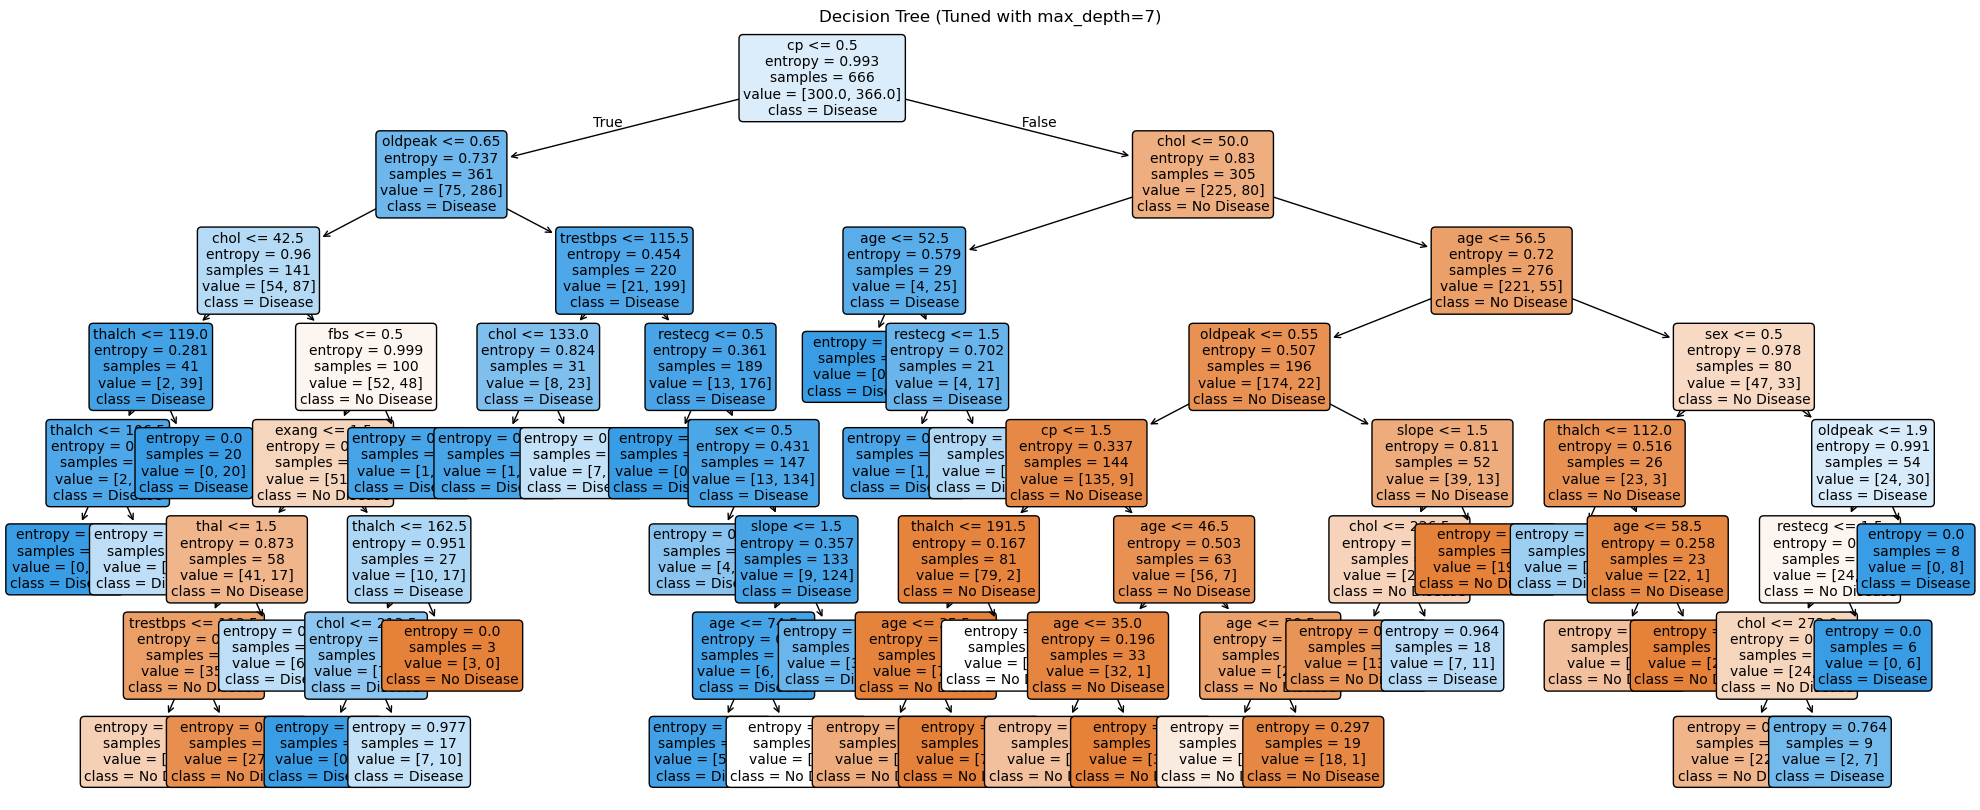

In [170]:
plt.figure(figsize=(25,10))
plot_tree(
    best_dt, 
    feature_names=X.columns, 
    class_names=["No Disease","Disease"], 
    filled=True, 
    rounded=True, 
    fontsize=10,
    max_depth=7
)
plt.title("Decision Tree (Tuned with max_depth=7)")
plt.show()


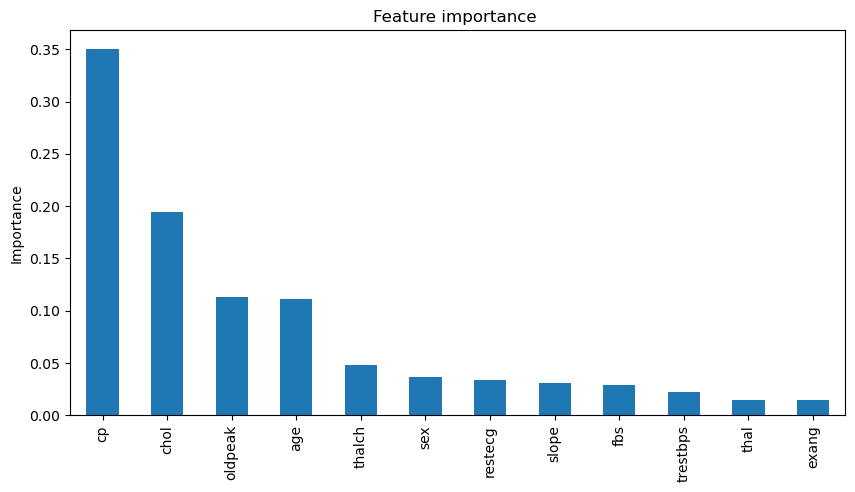

In [172]:
feat_importances = pd.Series(best_dt.feature_importances_, index=X.columns)

feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature importance ")
plt.ylabel("Importance")
plt.show()


cp has high importance

In [175]:
from sklearn.metrics import roc_curve, roc_auc_score


In [177]:
y_pred_proba = best_dt.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

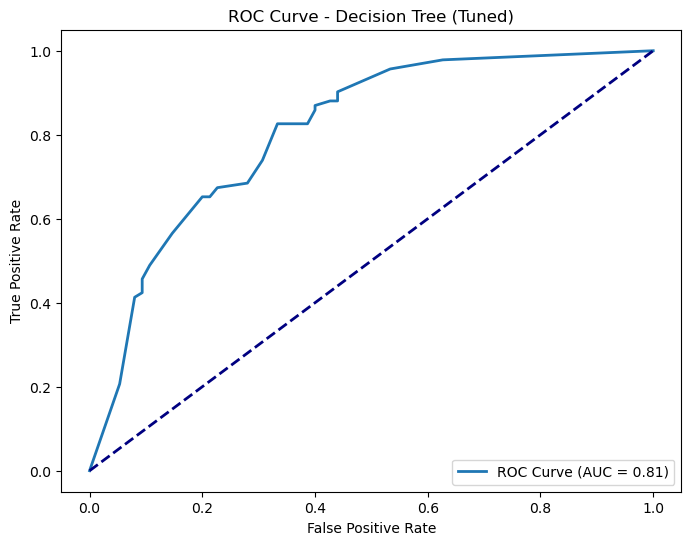

In [183]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')  # diagonal = random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (Tuned)")
plt.legend(loc="lower right")
plt.show()

we can see the 81% auc score which is useful clinically 

# Interview Questions: #
#### ****1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**** ####

some common hyperparameters of decision tree are max_depth,min_samples_split,min_samples_leaf,max_features,criterion 

these helps the model to control the complexity of the tree and manage  overfitting and underfitting

#### ****2. What is the difference between the Label encoding and One-hot encoding?**** ####

label encoding - it assigns integers for categorical variables according to their alphabetical order

on hot encoding - it creates seperate binary columns for each category 